# 모듈 불러오기

In [113]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#기본
import sys
import warnings
warnings.filterwarnings('ignore')
import os

# 전처리  
import numpy as np
import pandas as pd

# 시각화
from matplotlib.gridspec import GridSpec
from matplotlib import font_manager, rc
import missingno as msno
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import platform
import matplotlib

import matplotlib.pyplot as plt

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )
plt.rcParams["font.family"] = 'AppleGothic'
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )
plt.rcParams['axes.unicode_minus'] = False




# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['AppleGothic']
10.0
# 설정 되어있는 폰트 글꼴
['AppleGothic']


# 데이터 불러오기

In [114]:
df = pd.read_csv("./실전db.csv")

In [115]:
df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [116]:
temp1 = df.copy()

In [117]:
import datetime
import time 
def getDay_c(a,b,c):
    #리스트에 월 ~ 일까지 담아둠
    daylist = ['월', '화', '수', '목', '금', '토', '일']
    #datetime.date(2019,1,20).weekday() 
    #weekday() 라는 메소드의 반환 값은 월요일은 0, 화요일은 1 이므로
    #요일의 값이 리스트의 0번째 값인 daylist[0] = '월' 방식으로 가져온다.
    return daylist[datetime.date(a,b,c).weekday()]

pd.to_datetime(temp1["JOIN_DATE"])
y = int(temp1["JOIN_DATE"][0][:4])
m = int(temp1["JOIN_DATE"][0][5:7])
d = int(temp1["JOIN_DATE"][0][-2:])

y,m,d
ddd = getDay_c(y,m,d) 
  # 입력한 날'
print(f"입력 한 {y}.{m}.{d} 는 {ddd}요일 입니다.")


입력 한 2014.1.7 는 화요일 입니다.


In [ ]:
pd.to_datetime(temp1["JOIN_DATE"])
temp1["weekend"] = ""
for i in range(len(temp1)):
    y = int(temp1["JOIN_DATE"][i][:4])
    m = int(temp1["JOIN_DATE"][i][5:7])
    d = int(temp1["JOIN_DATE"][i][-2:])
    ddd = getDay_c(y,m,d) 
    temp1["weekend"][i] = ddd

In [ ]:
temp1.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,weekend
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,화
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,금
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,목
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,목
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,일


In [ ]:
temp1.to_csv("./모두컴퍼니_weekend.csv")

In [ ]:
temp2 = pd.read_csv("./모두컴퍼니_weekend.csv")
temp2.drop(["Unnamed: 0"],axis=1,inplace=True)
temp2.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,weekend
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,화
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,금
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,목
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,목
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,일


# 결측값 확인

In [ ]:
temp2.isna().sum()

USER_ID       0
JOIN_DATE     0
D_TYPE        0
STORE_ID      0
GOODS_TYPE    0
DATE          0
COUNT         0
AD1           0
weekend       0
dtype: int64

# 상관성 분석

<AxesSubplot:title={'center':'Correlation Matrix'}>

<Figure size 720x720 with 0 Axes>

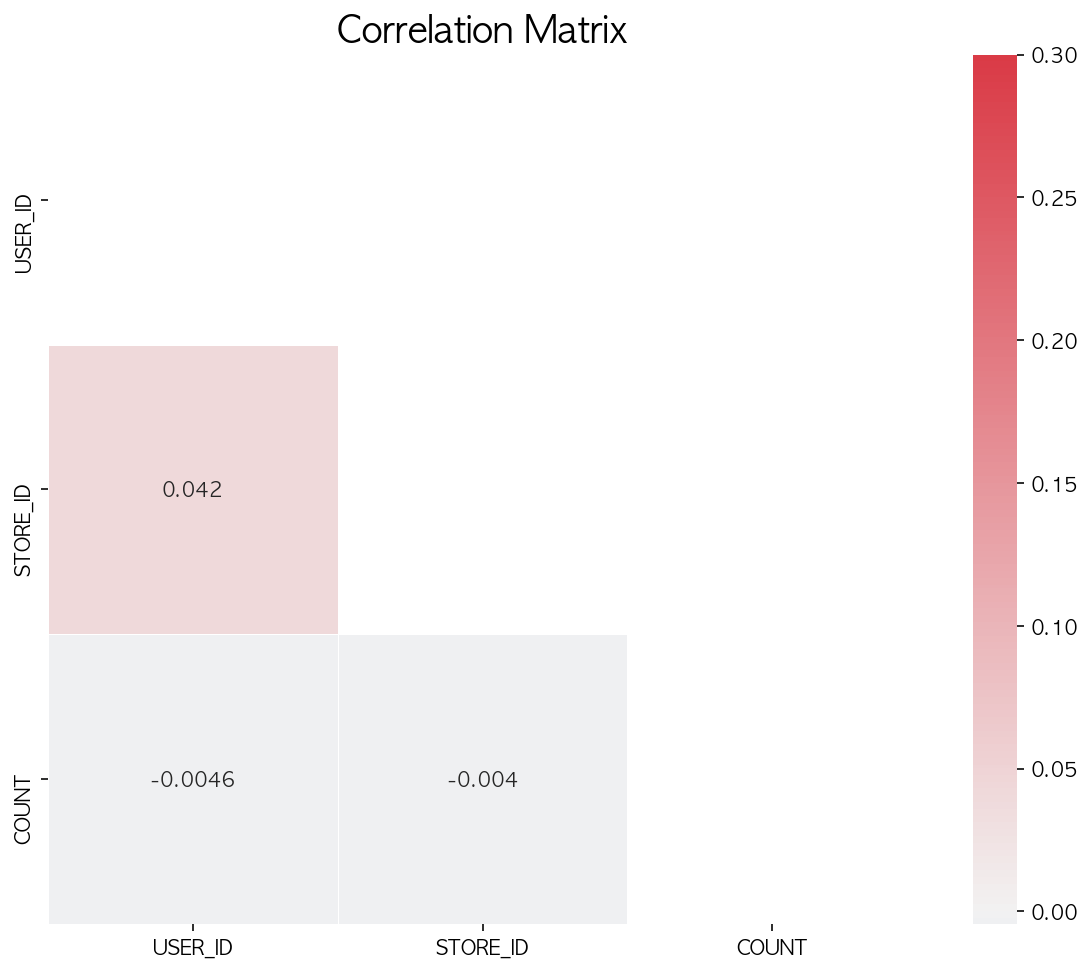

In [ ]:
corr = temp2.corr()
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)

# 데이터 확인

In [ ]:
temp2.describe()

,USER_ID,STORE_ID,COUNT
count,8.792710e+05,879271.000000,879271.000000
mean,1.206566e+06,149599.960642,1.029079
std,4.206529e+05,68898.035318,0.512428
min,2.240000e+02,4.000000,1.000000
25%,9.005760e+05,92437.000000,1.000000
50%,1.321440e+06,173059.000000,1.000000
75%,1.542416e+06,220661.000000,1.000000
max,1.830598e+06,231465.000000,61.000000


In [119]:
temp2["DATE"].unique()

array(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
       '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
       '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
       '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
       '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
       '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
       '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
       '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
       '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
       '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
       '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-

In [121]:
 temp2["year"] = temp2["JOIN_DATE"].apply(lambda x: x[:4])
 temp2["month"] =temp2["JOIN_DATE"].apply(lambda x: x[5:7])
 temp2["day"] = temp2["JOIN_DATE"].apply(lambda x: x[-2:])
temp2


,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,weekend,year,month,day
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,화,2014,01,07
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,금,2014,02,14
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,목,2014,11,20
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,목,2014,12,04
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,일,2014,12,07
...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,목,2020,12,31
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,목,2020,12,31
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,목,2020,12,31
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,목,2020,12,31


In [122]:
temp3=temp2.groupby(temp2["weekend"]).count().sort_values(by="weekend",axis=0,ascending=[["월","화","수","목","금","일"]])
temp3[["COUNT"]].head()

,COUNT
weekend,
금,135396
목,129435
수,128471
월,132002
일,98745


Text(0, 0.5, 'COUNT')

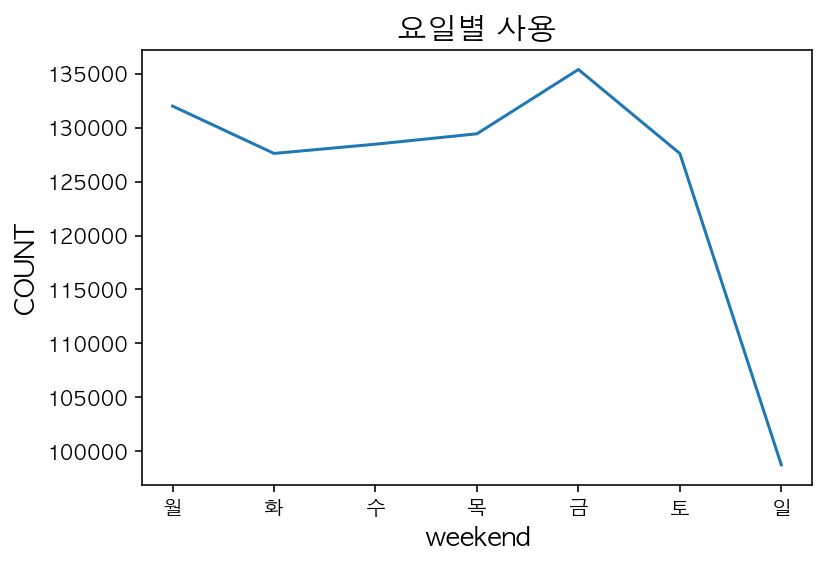

In [125]:
day_order = ["월","화","수","목","금","토","일"]
sns.lineplot(data=temp3.loc[day_order]["COUNT"])
plt.title("요일별 사용", fontsize=15)
plt.xlabel("weekend",fontsize=13)
plt.ylabel("COUNT",fontsize=13)

In [129]:
weather = pd.read_csv("./서울시_기상데이터.csv",encoding="euc-kr")
weather

,지점,일시,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도
0,108,2020-01-01 1:00,-5.9,NaN,1.7,40,NaN,NaN,-2.4,3.2
1,108,2020-01-01 2:00,-5.7,NaN,0.1,42,NaN,NaN,-2.4,3.1
2,108,2020-01-01 3:00,-5.6,0.0,0.0,46,NaN,NaN,-2.7,3.1
3,108,2020-01-01 4:00,-5.4,NaN,0.0,50,NaN,NaN,-2.5,3.0
4,108,2020-01-01 5:00,-5.2,NaN,0.0,55,NaN,NaN,-2.2,3.0
...,...,...,...,...,...,...,...,...,...,...
8755,108,2020-12-30 20:00,-11.8,NaN,4.8,54,NaN,NaN,-6.5,2.2
8756,108,2020-12-30 21:00,-12.4,NaN,3.2,58,NaN,NaN,-6.9,2.2
8757,108,2020-12-30 22:00,-12.7,NaN,2.8,56,NaN,NaN,-7.1,2.1
8758,108,2020-12-30 23:00,-12.9,NaN,2.2,54,NaN,NaN,-7.3,2.1


In [130]:
weather["일시"].unique()

array(['2020-01-01 1:00', '2020-01-01 2:00', '2020-01-01 3:00', ...,
       '2020-12-30 22:00', '2020-12-30 23:00', '2020-12-31 0:00'],
      dtype=object)

In [135]:
weather["일시"][0][:-5]

'2020-01-01'

In [136]:
 weather["date"] = weather["일시"].apply(lambda x: x[:-5])

In [137]:
weather.head()

,지점,일시,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도,date
0,108,2020-01-01 1:00,-5.9,NaN,1.7,40,NaN,NaN,-2.4,3.2,2020-01-01
1,108,2020-01-01 2:00,-5.7,NaN,0.1,42,NaN,NaN,-2.4,3.1,2020-01-01
2,108,2020-01-01 3:00,-5.6,0.0,0.0,46,NaN,NaN,-2.7,3.1,2020-01-01
3,108,2020-01-01 4:00,-5.4,NaN,0.0,50,NaN,NaN,-2.5,3.0,2020-01-01
4,108,2020-01-01 5:00,-5.2,NaN,0.0,55,NaN,NaN,-2.2,3.0,2020-01-01


# 기온, 강수량에 따른 사용량

In [139]:
merge1 = temp2.merge(weather, left_on='DATE', right_on='date')

In [140]:
merge1.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,weekend,year,...,일시,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도,date
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,화,2014,...,2020-01-01 1:00,-5.9,NaN,1.7,40,NaN,NaN,-2.4,3.2,2020-01-01
1,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,화,2014,...,2020-01-01 2:00,-5.7,NaN,0.1,42,NaN,NaN,-2.4,3.1,2020-01-01
2,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,화,2014,...,2020-01-01 3:00,-5.6,0.0,0.0,46,NaN,NaN,-2.7,3.1,2020-01-01
3,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,화,2014,...,2020-01-01 4:00,-5.4,NaN,0.0,50,NaN,NaN,-2.5,3.0,2020-01-01
4,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,화,2014,...,2020-01-01 5:00,-5.2,NaN,0.0,55,NaN,NaN,-2.2,3.0,2020-01-01


In [143]:
merge1 = merge1.fillna(0)
merge1.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,weekend,year,...,일시,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도,date
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,화,2014,...,2020-01-01 1:00,-5.9,0.0,1.7,40,0.0,0.0,-2.4,3.2,2020-01-01
1,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,화,2014,...,2020-01-01 2:00,-5.7,0.0,0.1,42,0.0,0.0,-2.4,3.1,2020-01-01
2,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,화,2014,...,2020-01-01 3:00,-5.6,0.0,0.0,46,0.0,0.0,-2.7,3.1,2020-01-01
3,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,화,2014,...,2020-01-01 4:00,-5.4,0.0,0.0,50,0.0,0.0,-2.5,3.0,2020-01-01
4,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,화,2014,...,2020-01-01 5:00,-5.2,0.0,0.0,55,0.0,0.0,-2.2,3.0,2020-01-01


In [149]:
te = merge1[["USER_ID","DATE","기온","강수량","COUNT"]]
te = te.groupby(["기온"]).mean().sort_values(by="기온",ascending=False)
te.head()

,USER_ID,강수량,COUNT
기온,,,
29.7,1.247531e+06,0.0,1.027367
28.8,1.251105e+06,0.0,1.028427
28.7,1.247531e+06,0.0,1.027367
28.6,1.247531e+06,0.0,1.027367
28.4,1.247531e+06,0.0,1.027367


## 온도와 상관이 없다..

In [150]:
te1 = merge1[["USER_ID","DATE","기온","강수량","COUNT"]]
te1 = te1.groupby(["강수량"]).mean().sort_values(by="강수량",ascending=False)
te1.head()

,USER_ID,기온,COUNT
강수량,,,
42.1,1.312172e+06,18.8,1.033352
36.8,1.312172e+06,18.5,1.033352
22.8,1.230004e+06,25.3,1.045838
22.1,1.261181e+06,25.2,1.033085
21.8,1.222680e+06,22.5,1.026250


## 강수량과도 관계 없어 보임.